In [1]:
import sys
import os
from pathlib import Path

current_dir = os.getcwd()

file = Path(current_dir).resolve()
sys.path.append(str(file.parents[0]))
sys.path.append(str(file.parents[1]))
sys.path.append(str(file.parents[2]))

In [2]:
#import cityscapesscripts
from torchvision.datasets.cityscapes import Cityscapes
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from utils.cs_tools import reduce_classes

In [3]:
cityscapes_root_path : Path = '/home/student/farid_ma/dev/multiclass_softseg/MulticlassSoftSeg/data/external/Cityscapes/'
cityscapes_ds = Cityscapes(root=cityscapes_root_path, target_type='semantic')

# Example Images

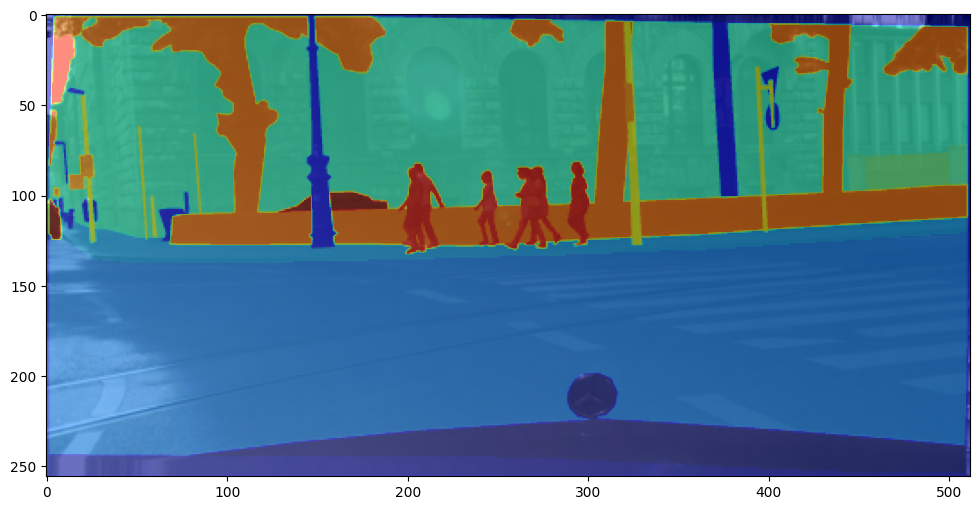

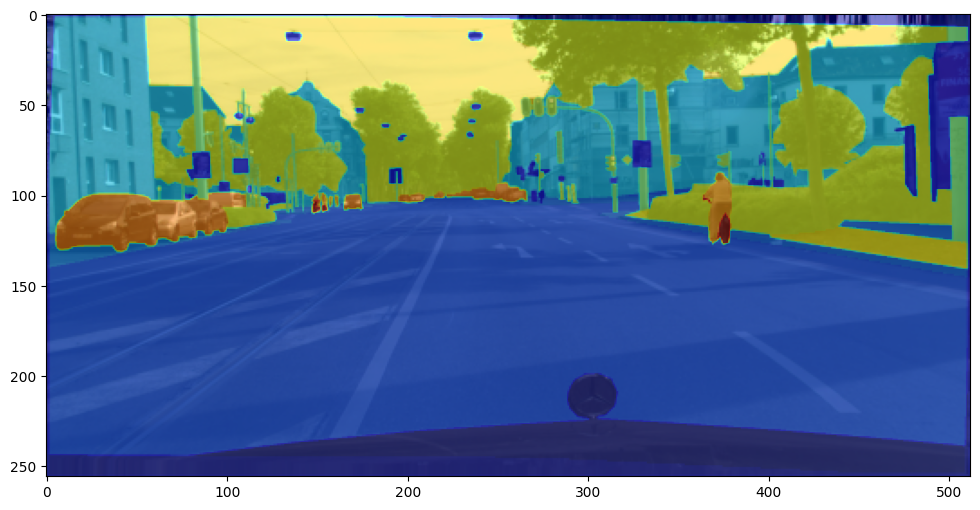

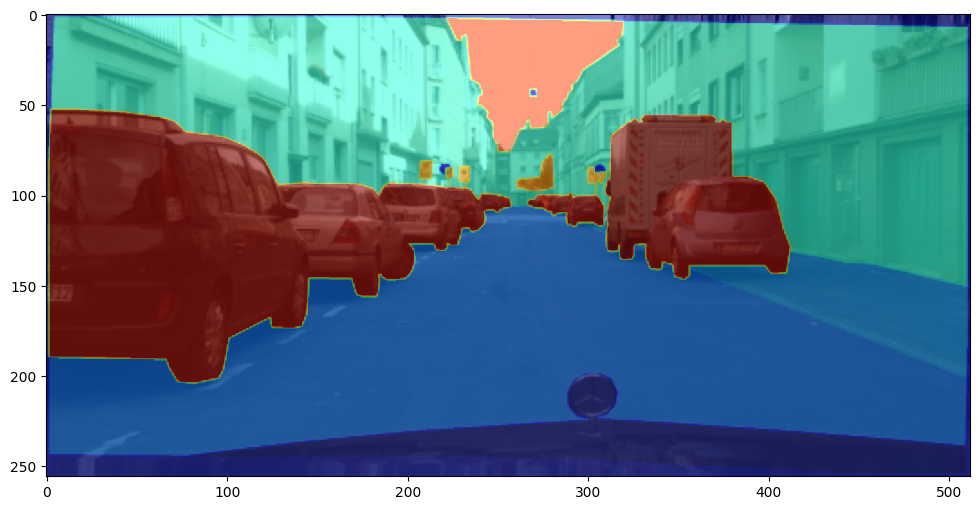

In [9]:
for i in range(3):
    img, gt = cityscapes_ds[i]
    plt.figure(figsize=[12, 6])
    plt.imshow(img.reduce(4))
    plt.imshow(gt.reduce(4), cmap= "jet", alpha = 0.5)
    plt.show()  

# Check how many images contain street sign class

In [7]:
test_range = 80
sign_counter = 0

for i in range(test_range):
    _, gt = cityscapes_ds[i]
    np_gt = np.array(gt)
    #print(f"unique classes in gt: {np.unique(np_gt)}")
    if 20 in np.unique(np_gt):
        #print(f"sample {i} contains street signs")
        sign_counter += 1

print(f" for {test_range} samples there are {sign_counter} traffic signs")


 for 80 samples there are 78 traffic signs


# Testing Downsample on dummy GT

In [ ]:
from skimage.measure import block_reduce

## Create dummy GT

In [36]:
# Define the dimensions
x, y = 200, 200  # Replace with your desired dimensions

# Create a 2D array filled with zeros
circle_array = np.zeros((x, y))

# Define the radius of the circle (let's assume a radius of 50)
radius = 50

# Calculate the center of the array
center_x, center_y = x // 2, y // 2

# Generate a meshgrid to calculate the distance from the center
X, Y = np.meshgrid(np.arange(x), np.arange(y), indexing='ij')

# Calculate the distance from the center for each point
distance = np.sqrt((X - center_x)**2 + (Y - center_y)**2)

# Set ones inside the circle (where the distance is less than or equal to the radius)
circle_array[distance <= radius] = 1

[]

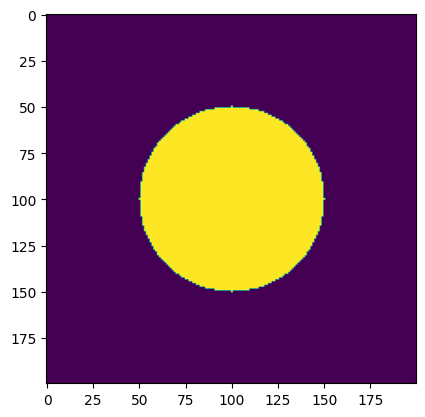

In [37]:
plt.imshow(circle_array)
plt.plot()

## Apply downsampling

Text(0.5, 1.0, 'gt downsampled by factor 4')

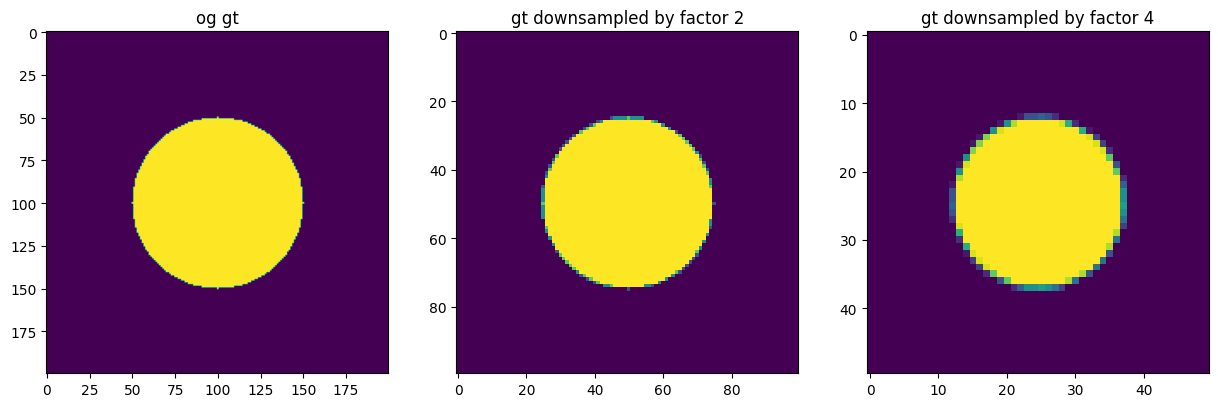

In [38]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(circle_array)
ax[0].set_title('og gt')
ax[1].imshow(block_reduce(circle_array,2))
ax[1].set_title('gt downsampled by factor 2')
ax[2].imshow(block_reduce(circle_array,4))
ax[2].set_title('gt downsampled by factor 4')

# Testing Downsampling on a ground truth and image

## Loading data and filtering only traffic sign class

In [8]:
#import torch.nn.functional as F
from skimage.measure import block_reduce

In [9]:
#loading img and gt
img, gt = cityscapes_ds[3]

class_id = 20

reduced_gt = reduce_classes(gt, class_id)

In [7]:
print(np.array(img).shape)
print(np.array(gt).shape)
print(reduced_gt.shape)

(1024, 2048, 3)
(1024, 2048)
(1024, 2048)


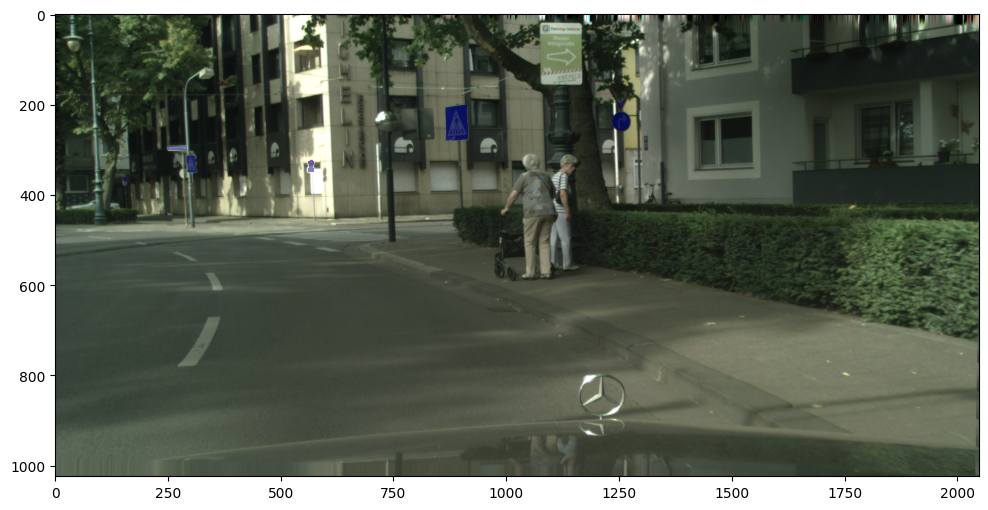

In [10]:
#creating a masked gt where background is transparent
gt_transparent = np.where(reduced_gt == 0, np.nan, reduced_gt)

#plotting all
plt.figure(figsize=[12, 6])
plt.imshow(img)
plt.imshow(gt_transparent, cmap= "jet", alpha = 0.5)
plt.show()

## Downsample img and gt

In [13]:
img_array = np.array(img)
down_gt = block_reduce(reduced_gt, block_size=4 ,func = np.mean)
down_img = block_reduce(img_array, block_size= (4,4,1), func = np.mean).astype(np.uint8)

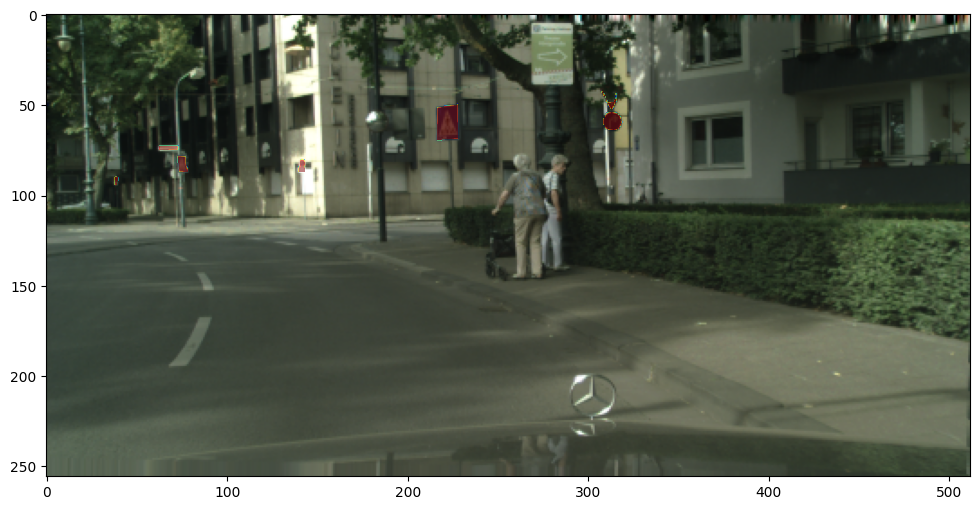

In [14]:
#creating a masked gt where background is transparent
gt_transparent = np.where(down_gt == 0, np.nan, down_gt)

plt.figure(figsize=[12, 6])
plt.imshow(down_img)
plt.imshow(gt_transparent, cmap= "jet", alpha = 0.5)
plt.show()

# Test CityscapesLightningModule

In [3]:
from data.cityscapes_dataset import CityscapesDataModule, CityscapesDataset
from argparse import Namespace

In [4]:
cityscapes_root_path : Path = '/home/student/farid_ma/dev/multiclass_softseg/MulticlassSoftSeg/data/external/Cityscapes/'
opt = Namespace(bs = 2, n_cpu = 20, ds_factor = 2, sigma = 1)
cs_ds = CityscapesDataset(opt, cityscapes_root_path)

In [11]:
dict = cs_ds[0]

TypeError: 'builtin_function_or_method' object is not subscriptable